## Representaciones Espaciales
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-industrial-python/blob/main/3-Representaciones-Espaciales/3-1-Representaciones-Espaciales.ipynb)

Oscar E. Ramos Ponce, Universidad de Ingeniería y Tecnología - UTEC
- Robótica Industrial

Este archivo contiene algunos ejemplos de las diapositivas del curso

In [1]:
import numpy as np

## 2. Matriz de Rotación

### Diapositiva 16: Matriz de Rotación - Ejemplo 1

In [2]:
# Parte a) Rotación del sistema B respecto del sistema A

R = np.array([[np.cos(np.pi/2),   np.cos(np.pi), np.cos(np.pi/2)],
              [      np.cos(0), np.cos(np.pi/2), np.cos(np.pi/2)],
              [np.cos(np.pi/2), np.cos(np.pi/2),       np.cos(0)]])

print(R)  # No muestra 1 ni 0 debido a aproximaciones del coseno 

[[ 6.123234e-17 -1.000000e+00  6.123234e-17]
 [ 1.000000e+00  6.123234e-17  6.123234e-17]
 [ 6.123234e-17  6.123234e-17  1.000000e+00]]


In [3]:
print(np.round(R,3))     # Se sugiere redondear

[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]


In [4]:
# Parte b) Rotación del sistema A respecto del sistema B 
# Por facilidad se puede crear un 'alias' para el coseno y pi de NumPy
cos = np.cos
pi = np.pi

R = np.array([[cos(pi/2),    cos(0), cos(pi/2)],
              [  cos(pi), cos(pi/2), cos(pi/2)],
              [cos(pi/2), cos(pi/2),    cos(0)]])
print(np.round(R,3))

[[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]


### Diapositiva 17: Matriz de Rotación - Ejemplo 2

Para utilizar elementos simbólicos se utilizará la biblioteca `sympy` de Python

In [5]:
import sympy as sp

In [6]:
# Definición de variables simbólicas
t = sp.symbols("t")

# Matriz de rotación alrededor de z
R = sp.Matrix([[        sp.cos(t),  sp.cos(sp.pi/2+t),  sp.cos(sp.pi/2)],
               [sp.cos(sp.pi/2-t),          sp.cos(t),  sp.cos(sp.pi/2)],
               [  sp.cos(sp.pi/2),    sp.cos(sp.pi/2),        sp.cos(0)]])
R

Matrix([
[cos(t), -sin(t), 0],
[sin(t),  cos(t), 0],
[     0,       0, 1]])

**NOTA**: EL `cos` DE SYMPY ES DIFERENTE AL `cos` DE NUMPY. IGUALMENTE `sin` y `pi`. Se debe tener cuidado con no mezclar numpy con sympy, especialmente cuando se utiliza "alias" para las funciones de numpy.

### Diapositiva 17: Matriz de Rotación - Ejemplo 3

Para realizar gráficos se utilizará la biblioteca `matplotlib` de Python. 

* Si se utiliza Google Colab es necesario instalar `ipympl` usando pip. Para ello, ejecutar la siguiente línea (solo funciona en Google Colab)

In [7]:
if 'google.colab' in str(get_ipython()):
    !pip install ipympl --quiet

Si se utiliza Google Colab, luego de haber ejecutado la línea anterior, **es necesario reiniciar**. Para ello, ir al menú `Runtime` y escoger `Restart runtime`. Es importante este paso en Google Colab, dado que de otro modo habrá error al momento de realizar la figura.

Luego, importar la biblioteca `matplotlib` (y nuevamente `numpy` en caso de haber reiniciado el entorno en Google Colab) 

In [12]:
import matplotlib.pyplot as plt
import numpy as np

* Si se utiliza Google Colab se debe ejecutar las siguientes dos líneas, que permiten la ejecución de widgets externos (a colab)

In [9]:
if 'google.colab' in str(get_ipython()):
    from google.colab import output
    output.enable_custom_widget_manager()

La siguiente línea permite graficar y visualizar de manera interactiva. Se sugiere las siguientes configuraciones
* Si se utiliza Jupyter notebook de Anaconda: `%matplotlib notebook`
* Si se utiliza VSCode o Google Colab: `%matplotlib widget`

Notar que al escoger una opción, ya no es posible modificarla más adelante. Para cambiar de opción es necesario reiniciar el kernel de Python.

In [11]:
%matplotlib widget

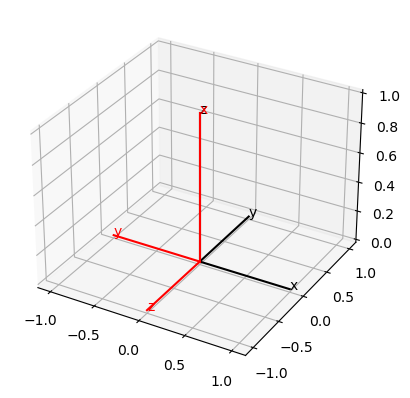

In [13]:
ax = plt.axes(projection='3d')

# Ejes canónicos
ax.plot([0,1],[0,0],[0,0], color='k')
ax.plot([0,0],[0,1],[0,0], color='k')
ax.plot([0,0],[0,0],[0,1], color='k')
# Nombres de los ejes
ax.text(1, 0, 0, 'x', color='k')
ax.text(0, 1, 0, 'y', color='k')
ax.text(0, 0, 1, 'z', color='k')

# Matriz de rotación
R = np.array([[0, -1,  0], 
              [0,  0, -1], 
              [1,  0, 0]])

# Ejes solicitados
ax.plot([0,R[0,0]], [0,R[1,0]], [0,R[2,0]], color='r')
ax.plot([0,R[0,1]], [0,R[1,1]], [0,R[2,1]], color='r')
ax.plot([0,R[0,2]], [0,R[1,2]], [0,R[2,2]], color='r')

# Nombres de los nuevos ejes
ax.text(R[0,0], R[1,0], R[2,0], 'x', color='r')
ax.text(R[0,1], R[1,1], R[2,1], 'y', color='r')
ax.text(R[0,2], R[1,2], R[2,2], 'z', color='r')

plt.show()

### Diapositiva 20: Transpuesta de una Matriz de Rotación

In [ ]:
import sympy as sp

In [ ]:
# Variables simbólicas que serán los componentes de los ejes
x1,x2,x3,y1,y2,y3,z1,z2,z3 = sp.symbols("x1 x2 x3 y1 y2 y3 z1 z2 z3")

# Matriz de rotación con ejes x=(x1,x2,x3), y=(y1,y2,y3), z=(z1,z2,z3)
R = sp.Matrix([[x1, y1, z1],
               [x2, y2, z2],
               [x3, y3, z3]])

R

Matrix([
[x1, y1, z1],
[x2, y2, z2],
[x3, y3, z3]])

In [ ]:
# Producto de la transpuesta de R con R
R.T * R

Matrix([
[x1**2 + x2**2 + x3**2, x1*y1 + x2*y2 + x3*y3, x1*z1 + x2*z2 + x3*z3],
[x1*y1 + x2*y2 + x3*y3, y1**2 + y2**2 + y3**2, y1*z1 + y2*z2 + y3*z3],
[x1*z1 + x2*z2 + x3*z3, y1*z1 + y2*z2 + y3*z3, z1**2 + z2**2 + z3**2]])

La expresión anterior es la identidad, considerando que los ejes son unitarios y perpendiculares entre sí

In [ ]:
# Producto de R con su transpuesta
R*R.T

Matrix([
[x1**2 + y1**2 + z1**2, x1*x2 + y1*y2 + z1*z2, x1*x3 + y1*y3 + z1*z3],
[x1*x2 + y1*y2 + z1*z2, x2**2 + y2**2 + z2**2, x2*x3 + y2*y3 + z2*z3],
[x1*x3 + y1*y3 + z1*z3, x2*x3 + y2*y3 + z2*z3, x3**2 + y3**2 + z3**2]])

### Diapositiva 22: Determinante de una Matriz de Rotación

In [ ]:
# Matriz de rotación con ejes x=(x1,x2,x3), y=(y1,y2,y3), z=(z1,z2,z3)
R = sp.Matrix([[x1, y1, z1],
               [x2, y2, z2],
               [x3, y3, z3]])
R

Matrix([
[x1, y1, z1],
[x2, y2, z2],
[x3, y3, z3]])

In [ ]:
# Determinante
detR = R.det()
detR

x1*y2*z3 - x1*y3*z2 - x2*y1*z3 + x2*y3*z1 + x3*y1*z2 - x3*y2*z1

In [ ]:
# Factorizando elementos del determinante
sp.collect(detR, ('x1', 'x2', 'x3'))

x1*(y2*z3 - y3*z2) + x2*(-y1*z3 + y3*z1) + x3*(y1*z2 - y2*z1)

In [ ]:
# Producto cruz de y con z (debe ser igual a x)
y = sp.Matrix([y1, y2, y3])
z = sp.Matrix([z1, z2, z3])
y.cross(z)

Matrix([
[ y2*z3 - y3*z2],
[-y1*z3 + y3*z1],
[ y1*z2 - y2*z1]])

### Diapositiva 24: Matriz de Rotación - Ejemplo 5

In [ ]:
# a)
R = np.array([[         -1/2,  0, -np.sqrt(3)/2],
              [            0,  1,             0],
              [-np.sqrt(3)/2,  0,           1/2]])

detR = np.linalg.det(R)
np.round(detR, 3)

-1.0

In [ ]:
# b)
R = np.array([[         -1/2,  0, -np.sqrt(3)/2],
              [            0,  1,             0],
              [ np.sqrt(3)/2,  0,          -1/2]])

# Condición 1
detR = np.linalg.det(R)
np.round(detR, 3)

1.0

In [ ]:
# Condición 2
R.dot(R.T)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# Esta verificación no es necesaria ya que si se cumple la anterior, también se cumplirá
R.T.dot(R)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Diapositiva 30: Matriz de Rotación - Ejemplo 6

In [ ]:
R = np.array([[  0.25,  0.433,  0.866],
              [ 0.866,   -0.5,    0  ],
              [ 0.433,   0.75,  -0.5 ]])
R

array([[ 0.25 ,  0.433,  0.866],
       [ 0.866, -0.5  ,  0.   ],
       [ 0.433,  0.75 , -0.5  ]])

In [ ]:
# a) Transpuesta
R.T

array([[ 0.25 ,  0.866,  0.433],
       [ 0.433, -0.5  ,  0.75 ],
       [ 0.866,  0.   , -0.5  ]])

In [ ]:
# b) Verificación
detR = np.linalg.det(R)
print(detR)

0.999945


In [ ]:
np.round( R.dot(R.T), 3)

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

In [ ]:
# c) Inversa
invR = np.linalg.inv(R)
np.round(invR, 3)

array([[ 0.25 ,  0.866,  0.433],
       [ 0.433, -0.5  ,  0.75 ],
       [ 0.866, -0.   , -0.5  ]])

### Diapositiva 30: Mapeo entre sistemas de Referencia - Ejemplo

In [ ]:
# a)
d1, d2 = sp.symbols("d1 d2")
Pb = sp.Matrix([d2, d1, 0])
Pb

Matrix([
[d2],
[d1],
[ 0]])

In [ ]:
# b)
Rab = sp.Matrix([[0, -1,  0],
                 [1,  0,  0],
                 [0,  0,  1]])

Pa = Rab*Pb
Pa

Matrix([
[-d1],
[ d2],
[  0]])

### Diapositiva 31: Operador de rotación - Ejemplo

In [ ]:
# Usando numpy (cálculos numéricos)

p1 = np.array([0, np.sqrt(3), 1])
R = np.array([[1, 0, 0],
              [0, np.cos(np.deg2rad(30)), -np.sin(np.deg2rad(30))],
              [0, np.sin(np.deg2rad(30)),  np.cos(np.deg2rad(30))]])

p2 = R.dot(p1)
p2

array([0.        , 1.        , 1.73205081])

In [ ]:
# Usando sympy (cálculos simbólicos)

p1 = sp.Matrix([0, sp.sqrt(3), 1])
R = sp.Matrix([[1, 0, 0],
               [0, sp.cos(sp.pi/6), -sp.sin(sp.pi/6)],
               [0, sp.sin(sp.pi/6),  sp.cos(sp.pi/6)]])

p2 = R * p1
p2

Matrix([
[      0],
[      1],
[sqrt(3)]])

## 3. Transformaciones Homogéneas

### Diapositiva 42: Composición de transformaciones homogéneas

In [ ]:
def Trasl(x,y,z):
    T = np.array([[1, 0, 0, x],
                  [0, 1, 0, y], 
                  [0, 0, 1, z],
                  [0, 0, 0, 1]])
    return T

def Trotx(ang):
    Tx = np.array([[1, 0, 0, 0],
                   [0, np.cos(ang), -np.sin(ang), 0],
                   [0, np.sin(ang),  np.cos(ang), 0],
                   [0, 0, 0, 1]])
    return Tx

T = Trasl(6, -2, 10) @ Trotx(np.pi/2)
np.round(T, 3)

array([[ 1.,  0.,  0.,  6.],
       [ 0.,  0., -1., -2.],
       [ 0.,  1.,  0., 10.],
       [ 0.,  0.,  0.,  1.]])

### Diapositiva 43: Composición de transformaciones homogéneas

In [ ]:
def sTrasl(x,y,z):
    T = sp.Matrix([[1, 0, 0, x],
                   [0, 1, 0, y], 
                   [0, 0, 1, z],
                   [0, 0, 0, 1]])
    return T

def sTrotx(ang):
    Tx = sp.Matrix([[1, 0, 0, 0],
                    [0, sp.cos(ang), -sp.sin(ang), 0],
                    [0, sp.sin(ang),  sp.cos(ang), 0],
                    [0, 0, 0, 1]])
    return Tx

def sTrotz(ang):
    Tz = sp.Matrix([[sp.cos(ang), -sp.sin(ang), 0, 0],
                    [sp.sin(ang),  sp.cos(ang), 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])
    return Tz

In [ ]:
# Variables simbólicas
a, b, d, t = sp.symbols("a b d t")
R = sTrotx(a)*sTrasl(b,0,0)*sTrasl(0,0,d)*sTrotz(t)
R

Matrix([
[       cos(t),       -sin(t),       0,         b],
[sin(t)*cos(a), cos(a)*cos(t), -sin(a), -d*sin(a)],
[sin(a)*sin(t), sin(a)*cos(t),  cos(a),  d*cos(a)],
[            0,             0,       0,         1]])

### Diapositiva 47: Transformaciones Homogéneas - Ejemplo 1

In [ ]:
T = np.array([[0, 1, 0, -4],
              [-1, 0, 0, 6],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])
p = np.array([2, 0, 1, 1])

T.dot(p)

array([-4,  4,  1,  1])

### Diapositiva 48: Transformaciones Homogéneas - Ejemplo 2

In [ ]:
T = Trasl(6, -2, 10) @ Trotx(np.pi/2)
np.round(T, 3)

array([[ 1.,  0.,  0.,  6.],
       [ 0.,  0., -1., -2.],
       [ 0.,  1.,  0., 10.],
       [ 0.,  0.,  0.,  1.]])

In [ ]:
p = np.array([-5, 2, -12, 1])

T.dot(p)

array([ 1., 10., 12.,  1.])

### Diapositiva 53: Transformaciones homogéneas - Ejemplo 2

In [ ]:
# b)

T01 = np.array([[1,0,0,0], [0,1,0,1], [0,0,1,1], [0,0,0,1]])
T02 = np.array([[1,0,0,-0.5], [0,1,0,1.5], [0,0,1,1], [0,0,0,1]])
T03 = np.array([[0,1,0,-0.5], [1,0,0,1.5], [0,0,-1,3], [0,0,0,1]])

T32 = np.linalg.inv(T03) @ T02
T32

array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2.],
       [ 0.,  0.,  0.,  1.]])

## 4. Parametrizaciones de la Orientación

## a. Ángulos Roll, Pitch, Yaw

### Diapositiva 56: Matriz de Rotación Equivalente

In [ ]:
# Definiciones de las matrices de rotación en y, z usando sympy
def sroty(ang):
    Ry = sp.Matrix([[sp.cos(ang), 0, sp.sin(ang)],
                    [0, 1, 0],
                    [-sp.sin(ang), 0, sp.cos(ang)]])
    return Ry

def srotz(ang):
    Rz = sp.Matrix([[sp.cos(ang), -sp.sin(ang), 0],
                   [sp.sin(ang), sp.cos(ang), 0],
                   [0,0,1]])
    return Rz

def srotx(ang):
    Rx = sp.Matrix([[1, 0, 0],
                    [0, sp.cos(ang), -sp.sin(ang)],
                    [0, sp.sin(ang), sp.cos(ang)]])
    return Rx

In [ ]:
# Variables simbólicas
r, p, y = sp.symbols("r p y")

# Matriz de rotación equivalente
R = srotz(r)*sroty(p)*srotx(y)
R

Matrix([
[cos(p)*cos(r), sin(p)*sin(y)*cos(r) - sin(r)*cos(y), sin(p)*cos(r)*cos(y) + sin(r)*sin(y)],
[sin(r)*cos(p), sin(p)*sin(r)*sin(y) + cos(r)*cos(y), sin(p)*sin(r)*cos(y) - sin(y)*cos(r)],
[      -sin(p),                        sin(y)*cos(p),                        cos(p)*cos(y)]])

### Diapositiva 58: Singularidades de RPY

In [ ]:
# Cuando pitch = 90
R = srotz(r)*sroty(sp.pi/2)*srotx(y)

sp.simplify(R)

Matrix([
[ 0, -sin(r - y), cos(r - y)],
[ 0,  cos(r - y), sin(r - y)],
[-1,           0,          0]])

In [ ]:
# Cuando pitch = -90
R = srotz(r)*sroty(-sp.pi/2)*srotx(y)

sp.simplify(R)

Matrix([
[0, -sin(r + y), -cos(r + y)],
[0,  cos(r + y), -sin(r + y)],
[1,           0,           0]])

### Diapositiva 59: Ejemplo de RPY

In [ ]:
R = np.array([[-0.5, -0.557, 0.663], [0.866, -0.321, 0.383], [0, 0.766, 0.643]])
R

array([[-0.5  , -0.557,  0.663],
       [ 0.866, -0.321,  0.383],
       [ 0.   ,  0.766,  0.643]])

In [ ]:
# Primera solución (con + en la raíz cuadrada de pitch)
r11 = R[0,0]; r12 = R[0,1]; r13 = R[0,2]
r21 = R[1,0]; r22 = R[1,1]; r23 = R[1,2]
r31 = R[2,0]; r32 = R[2,1]; r33 = R[2,2]

p = np.arctan2(-r31, np.sqrt(r32**2+r33**2))
cp = np.cos(p)
r = np.arctan2(r21/cp, r11/cp)
y = np.arctan2(r32/cp, r33/cp)

angulos = np.array([r, p, y])
print("RPY en radianes:", np.round(angulos,3))
print("RPY en grados:", np.rad2deg(angulos))

RPY en radianes: [ 2.094 -0.     0.872]
RPY en grados: [120.00072778  -0.          49.98904228]


In [ ]:
# Segunda solución (con - en la raíz cuadrada de pitch)

p = np.arctan2(-r31, -np.sqrt(r32**2+r33**2))
cp = np.cos(p)
r = np.arctan2(r21/cp, r11/cp)
y = np.arctan2(r32/cp, r33/cp)

angulos = np.array([r, p, y])
print("RPY en radianes:", np.round(angulos,3))
print("RPY en grados:", np.rad2deg(angulos))

RPY en radianes: [-1.047 -3.142 -2.269]
RPY en grados: [ -59.99927222 -180.         -130.01095772]


## b. Coordenadas Exponenciales - Eje/Ángulo

### Diapositiva 65: Fórmula de Rodrigues

In [ ]:
t, x, y, z = sp.symbols("t x y z")

# Por facilidad se llamará (x,y,z) a los elementos del vector u
uhat = sp.Matrix([[   0, -z,  y],
                  [  z,   0, -x],
                  [ -y,  x,   0]])
uhat      

Matrix([
[ 0, -z,  y],
[ z,  0, -x],
[-y,  x,  0]])

In [ ]:
R = sp.eye(3) + uhat*sp.sin(t) + uhat*uhat*(1-sp.cos(t))

# Forma explícita de la fórmula
R

Matrix([
[(1 - cos(t))*(-y**2 - z**2) + 1,     x*y*(1 - cos(t)) - z*sin(t),     x*z*(1 - cos(t)) + y*sin(t)],
[    x*y*(1 - cos(t)) + z*sin(t), (1 - cos(t))*(-x**2 - z**2) + 1,    -x*sin(t) + y*z*(1 - cos(t))],
[    x*z*(1 - cos(t)) - y*sin(t),     x*sin(t) + y*z*(1 - cos(t)), (1 - cos(t))*(-x**2 - y**2) + 1]])

### Diapositiva 67: Singularidades de eje-ángulo

In [ ]:
# Cuando el ángulo es 0
t = 0
R = sp.eye(3) + uhat*sp.sin(t) + uhat*uhat*(1-sp.cos(t))
R

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [ ]:
# Cuando el ángulo es 180°
t = sp.pi
R = sp.eye(3) + uhat*sp.sin(t) + uhat*uhat*(1-sp.cos(t))
R

Matrix([
[-2*y**2 - 2*z**2 + 1,                2*x*y,                2*x*z],
[               2*x*y, -2*x**2 - 2*z**2 + 1,                2*y*z],
[               2*x*z,                2*y*z, -2*x**2 - 2*y**2 + 1]])

### Diapositiva 69: Ejemplo 1

In [ ]:
R = np.array([[0.926, -0.304, 0.226], [0.363, 0.881, -0.304], [-0.107, 0.363, 0.926]])
R

array([[ 0.926, -0.304,  0.226],
       [ 0.363,  0.881, -0.304],
       [-0.107,  0.363,  0.926]])

In [ ]:
r11 = R[0,0]; r12 = R[0,1]; r13 = R[0,2]
r21 = R[1,0]; r22 = R[1,1]; r23 = R[1,2]
r31 = R[2,0]; r32 = R[2,1]; r33 = R[2,2]

# Usando la raíz positiva
th = np.arctan2(np.sqrt((r21-r12)**2+(r31-r13)**2+(r32-r23)**2)/2, (np.trace(R)-1)/2)
u = 1/(2*np.sin(th)) * np.array([r32-r23, r13-r31, r21-r12])

print("Ángulo:", np.rad2deg(th))
print("Eje:", u)

Ángulo: 29.994679139602383
Eje: [0.66710731 0.33305357 0.66710731]


In [ ]:
# Usando la raíz negativa
th = np.arctan2(-np.sqrt((r21-r12)**2+(r31-r13)**2+(r32-r23)**2)/2, (np.trace(R)-1)/2)
u = 1/(2*np.sin(th)) * np.array([r32-r23, r13-r31, r21-r12])

print("Ángulo:", np.rad2deg(th))
print("Eje:", u)

Ángulo: -29.994679139602383
Eje: [-0.66710731 -0.33305357 -0.66710731]


### Diapositiva 70: Ejemplo 2

In [ ]:
t = sp.symbols("t")

uhat = sp.Matrix([[  0, 0,  0],
                  [  0, 0, -1],
                  [  0, 1,  0]])
R = sp.eye(3) + uhat*sp.sin(t) + uhat*uhat*(1-sp.cos(t))
R

Matrix([
[1,      0,       0],
[0, cos(t), -sin(t)],
[0, sin(t),  cos(t)]])

### Diapositiva 71: Ejemplo 3

In [ ]:
u = np.array([2, 1, 2])
u = u/np.linalg.norm(u)
u

array([0.66666667, 0.33333333, 0.66666667])

In [ ]:
t = np.deg2rad(30)
uhat = np.array([[     0, -u[2],  u[1]],
                 [  u[2],     0, -u[0]],
                 [ -u[1],  u[0],    0]])
R = np.eye(3) + uhat*np.sin(t) + uhat@uhat*(1-np.cos(t))

np.round(R,3)

array([[ 0.926, -0.304,  0.226],
       [ 0.363,  0.881, -0.304],
       [-0.107,  0.363,  0.926]])

In [ ]:
# Verificación:
print("Determinante:", np.linalg.det(R))
print("R*R^T:\n", np.round(R@R.T, 3))

Determinante: 1.0
R*R^T:
 [[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]]


## c. Cuaterniones Unitarios

### Diapositiva 72: Producto de cuaterniones

In [ ]:
x1, y1, z1, w1 = sp.symbols("x1 y1 z1 w1")
x2, y2, z2, w2 = sp.symbols("x2 y2 z2 w2")

# Parte vectorial del cuaternión 1
e1 = sp.Matrix([x1, y1, z1])
# Parte vectorial del cuaternión 2
e2 = sp.Matrix([x2, y2, z2])

In [ ]:
# Parte escalar del producto (se requiere el [0] ya que el resultad por defecto es un vector de 1 solo elemento, y se desea dicho elemento)
w12 = w1*w2 - (e1.T *e2)[0]
# Parte vectorial del producto
e12 = w1*e2 + w2*e1 + e1.cross(e2)

print("Parte escalar", w12)
print("Parte vectorial:"); e12

Parte escalar w1*w2 - x1*x2 - y1*y2 - z1*z2
Parte vectorial:


Matrix([
[w1*x2 + w2*x1 + y1*z2 - y2*z1],
[w1*y2 + w2*y1 - x1*z2 + x2*z1],
[w1*z2 + w2*z1 + x1*y2 - x2*y1]])

In [ ]:
# Usando la matriz equivalente para el primer cuaternión
Q1hat = sp.Matrix([[ w1, -x1, -y1, -z1],
                   [ x1,  w1, -z1,  y1],
                   [ y1,  z1,  w1, -x1],
                   [ z1, -y1,  x1,  w1]])

# Segundo cuaternión 
Q2 = sp.Matrix([w2, x2, y2, z2])

# Cuaternión producto de Q1 y Q2
Q1hat * Q2

Matrix([
[w1*w2 - x1*x2 - y1*y2 - z1*z2],
[w1*x2 + w2*x1 + y1*z2 - y2*z1],
[w1*y2 + w2*y1 - x1*z2 + x2*z1],
[w1*z2 + w2*z1 + x1*y2 - x2*y1]])

### Diapositiva 77: Ejemplo

In [ ]:
R = np.array([[ 0.321, -0.117,  0.940],
              [ 0.683,  0.716, -0.145],
              [-0.656,  0.688,  0.310]])
R

array([[ 0.321, -0.117,  0.94 ],
       [ 0.683,  0.716, -0.145],
       [-0.656,  0.688,  0.31 ]])

In [ ]:
r11 = R[0,0]; r12 = R[0,1]; r13 = R[0,2]
r21 = R[1,0]; r22 = R[1,1]; r23 = R[1,2]
r31 = R[2,0]; r32 = R[2,1]; r33 = R[2,2]

w = 0.5 * np.sqrt(1+r11+r22+r33)
ex = 1/(4*w)*(r32-r23)
ey = 1/(4*w)*(r13-r31)
ez = 1/(4*w)*(r21-r12)

Q = [w, ex, ey, ez]
np.round(Q,3)

array([0.766, 0.272, 0.521, 0.261])

In [ ]:
# Matriz de rotación equivalente
R = np.array([[2*(w**2+ex**2)-1,   2*(ex*ey-w*ez),   2*(ex*ez+w*ey)],
              [  2*(ex*ey+w*ez), 2*(w**2+ey**2)-1,   2*(ey*ez-w*ex)],
              [  2*(ex*ez-w*ey),   2*(ey*ez+w*ex), 2*(w**2+ez**2)-1]])

np.round(R, 3)

array([[ 0.321, -0.117,  0.94 ],
       [ 0.683,  0.716, -0.144],
       [-0.656,  0.689,  0.31 ]])